Missing values per column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Accuracy: 0.9473684210526315

Classification Report:
       

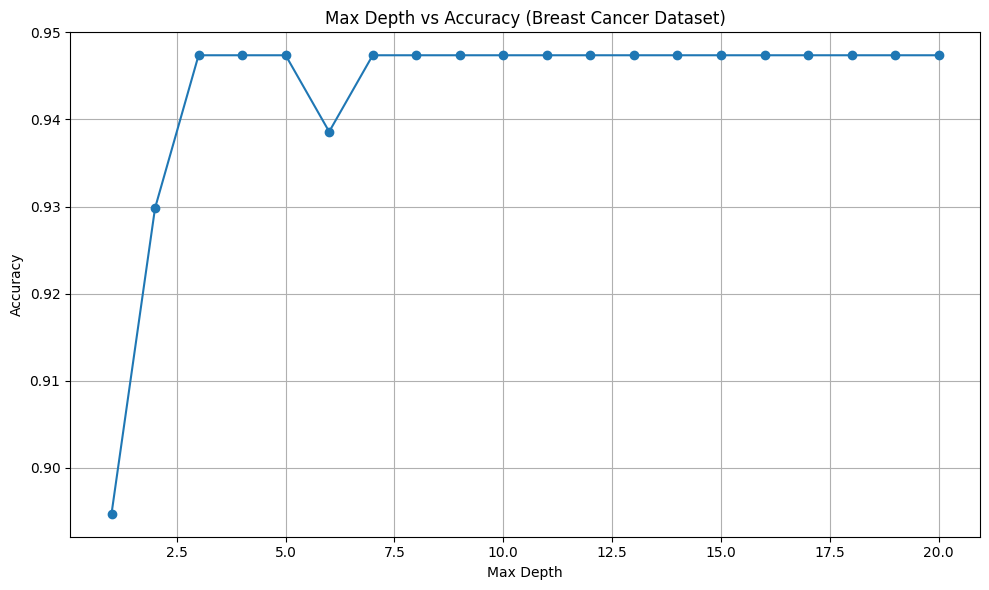

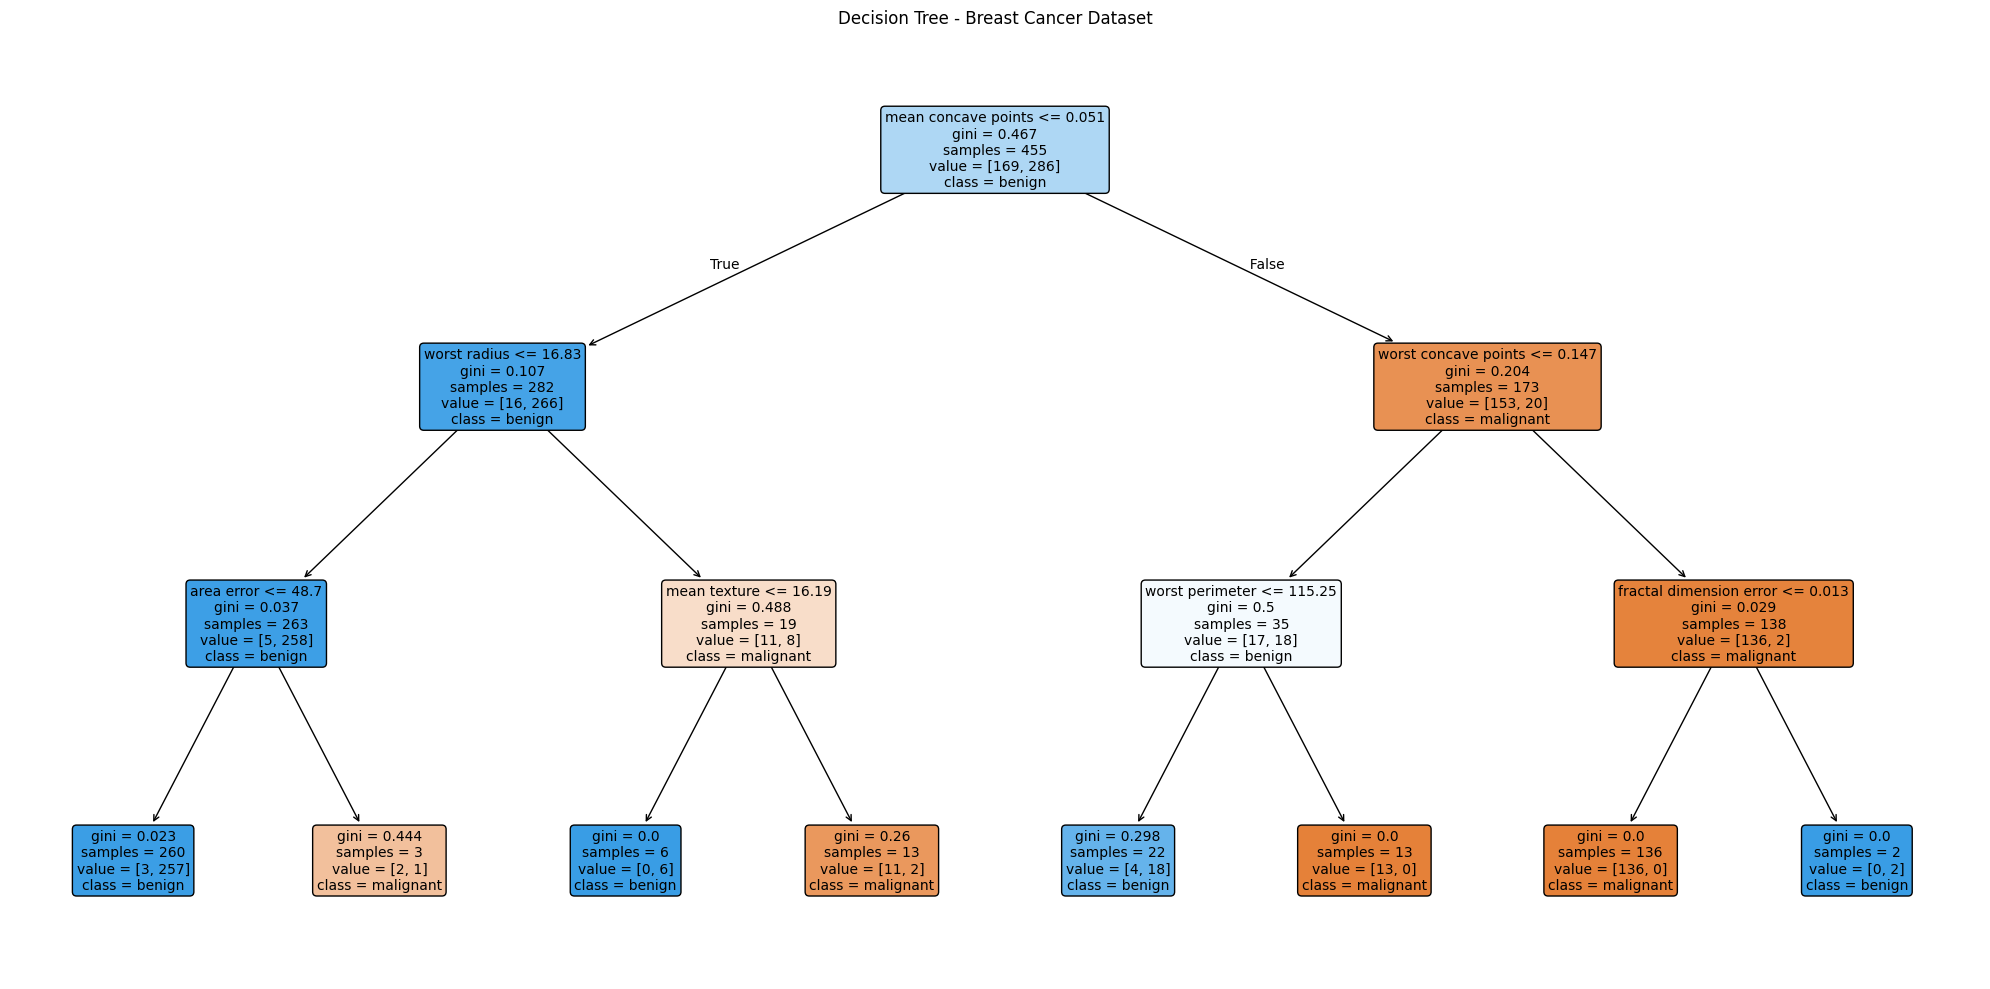

Best max_depth: 3 with accuracy: 0.9474
Decision tree and accuracy vs depth plot saved.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# Load datasetd
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Split dataset
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save results to file
with open("breast_cancer_results.txt", "w") as f:
    f.write(f"Accuracy: {accuracy}\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred))
    f.write("\nConfusion Matrix:\n")
    f.write(str(confusion_matrix(y_test, y_pred)))

# Analyze max_depth
depths = list(range(1, 21))
scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_d = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_d)
    scores.append(acc)

# Plot depth vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(depths, scores, marker="o")
plt.title("Max Depth vs Accuracy (Breast Cancer Dataset)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.savefig("breast_cancer_accuracy_vs_depth.png")
plt.show()

# Train final model with best depth
best_depth = depths[scores.index(max(scores))]
clf_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf_final.fit(X_train, y_train)

# Visualize decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf_final,
    feature_names=X.columns,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.title("Decision Tree - Breast Cancer Dataset")
plt.tight_layout()
plt.savefig("breast_cancer_decision_tree.png")
plt.show()

print(f"Best max_depth: {best_depth} with accuracy: {max(scores):.4f}")
print("Decision tree and accuracy vs depth plot saved.")
